# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


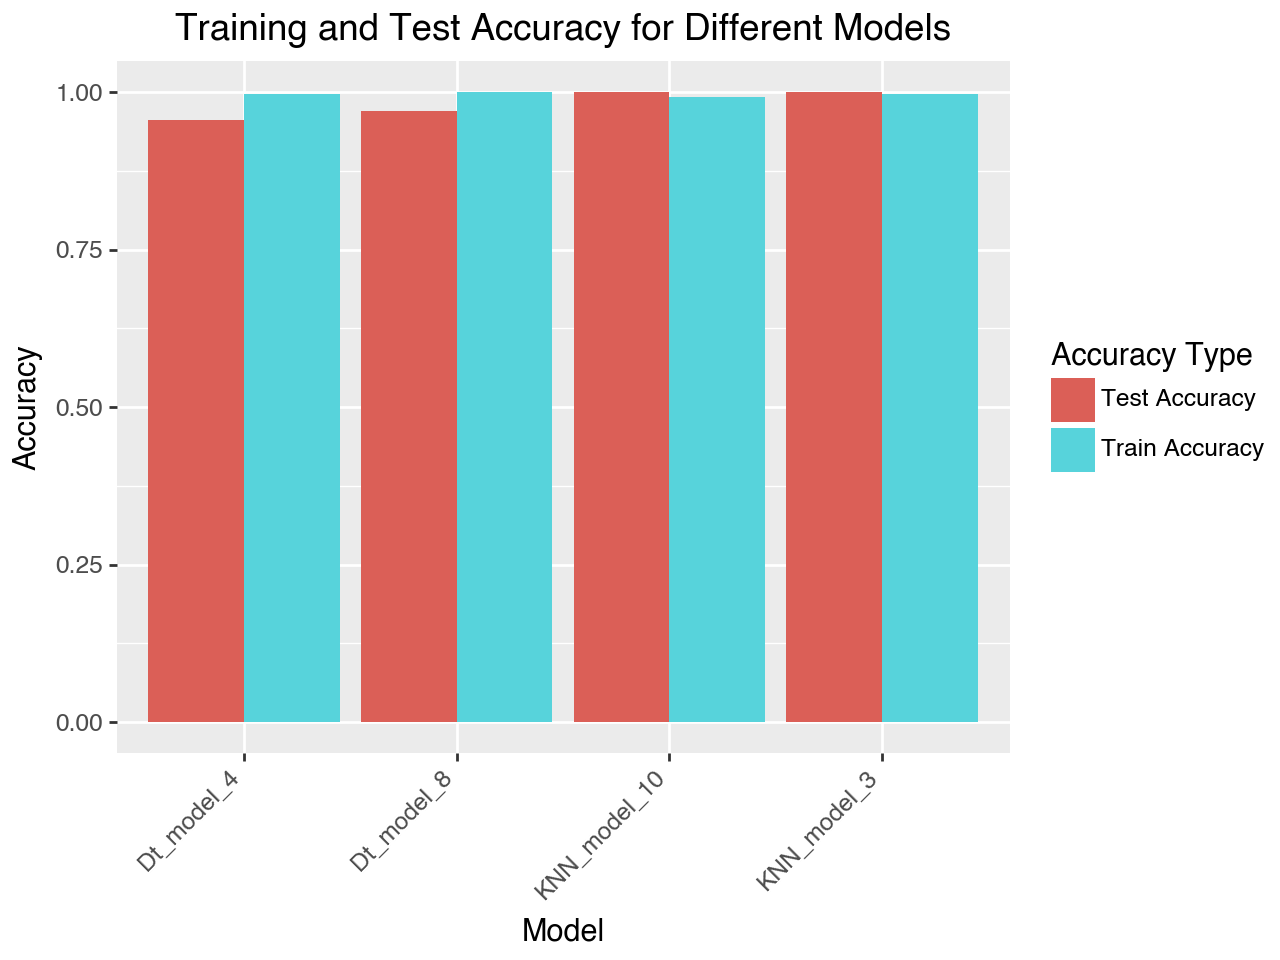

In [34]:
pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


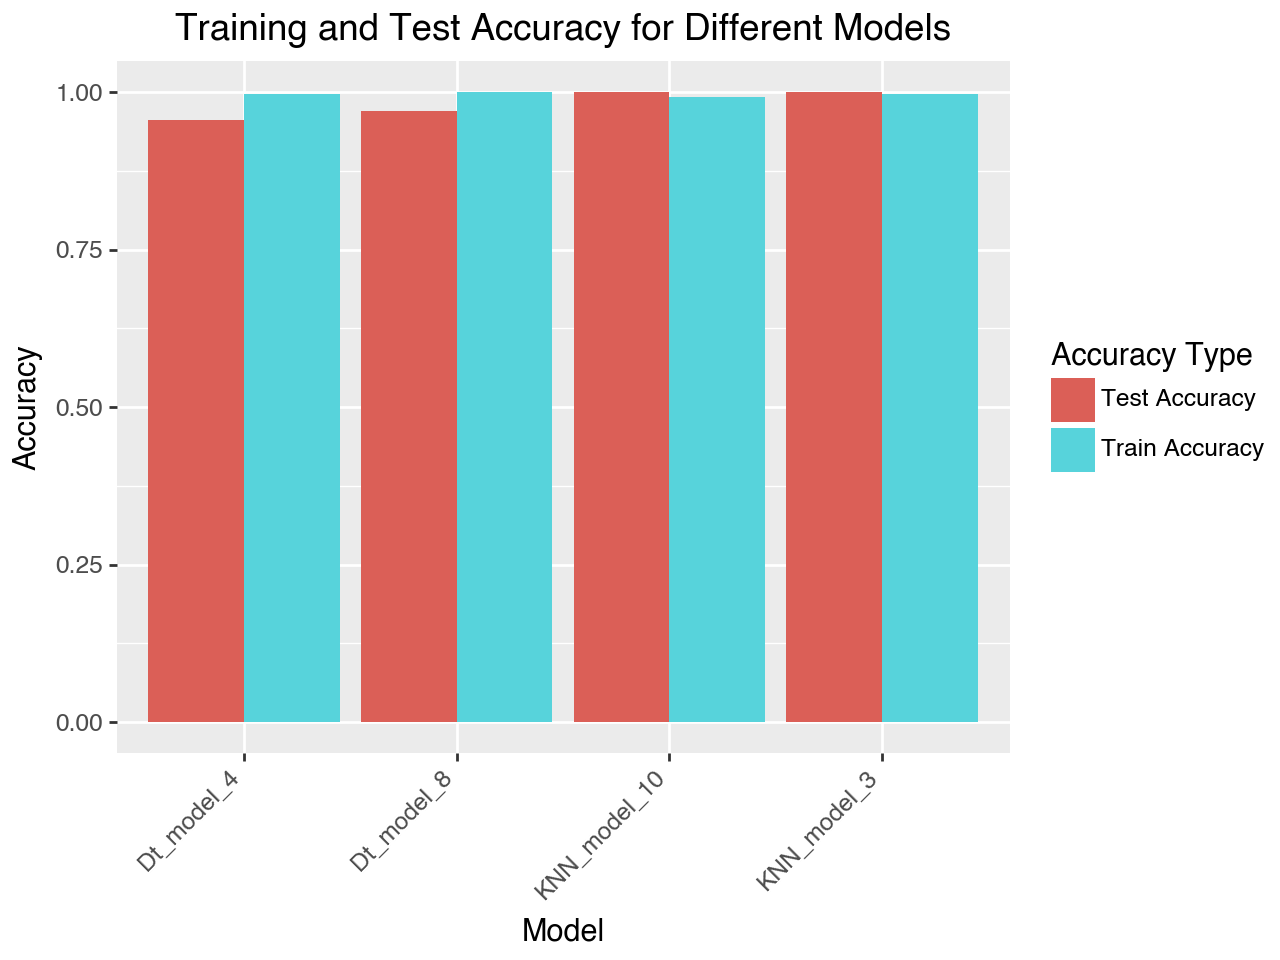

In [35]:
pip install sklearn

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


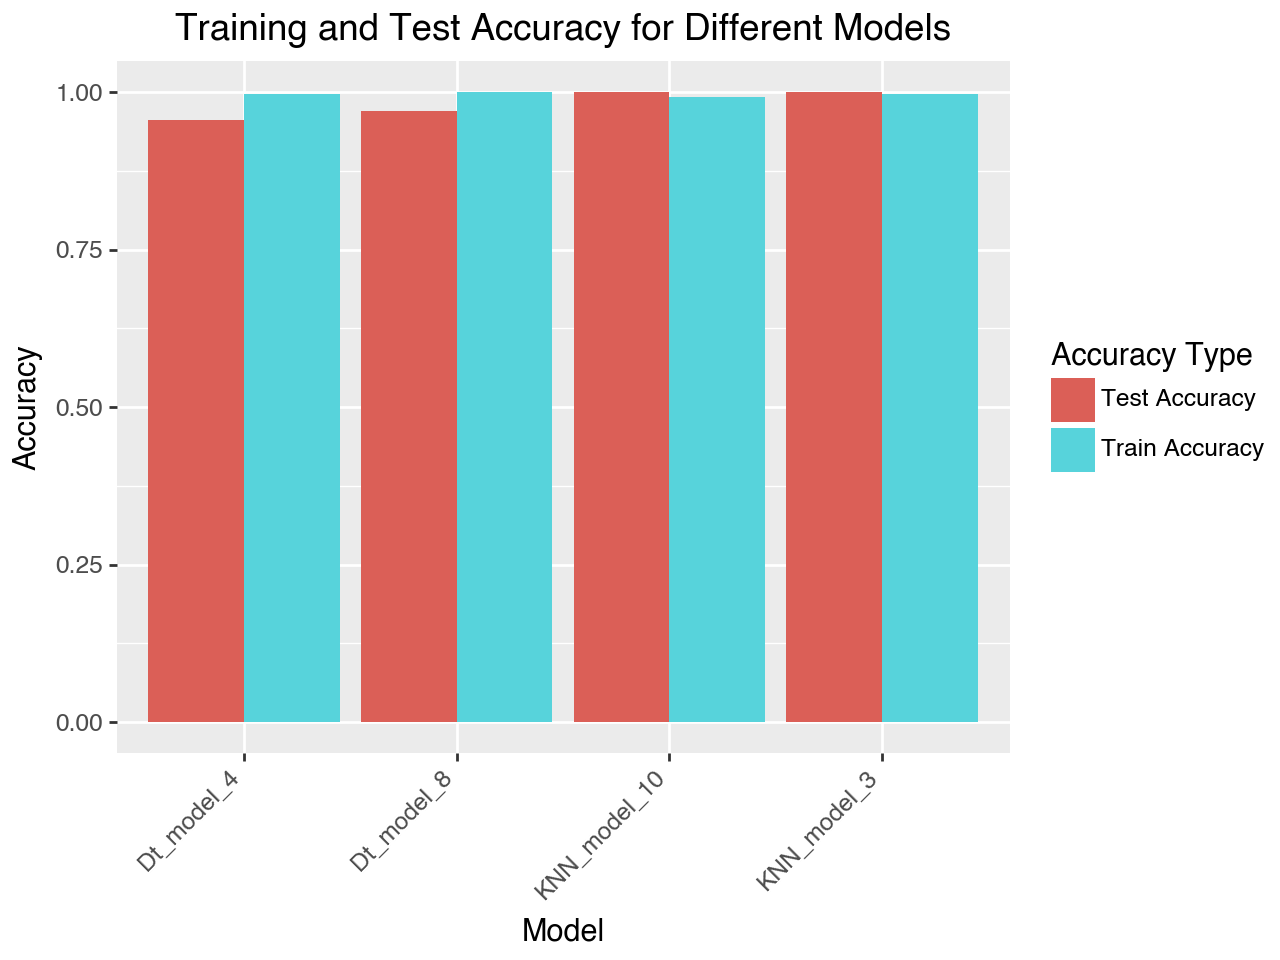

In [36]:
import pandas as pd
import seaborn as sns

penguins = sns.load_dataset('penguins')
display(penguins.head())

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,0,0,1,0,1


0    Adelie
1    Adelie
2    Adelie
4    Adelie
5    Adelie
Name: species, dtype: object

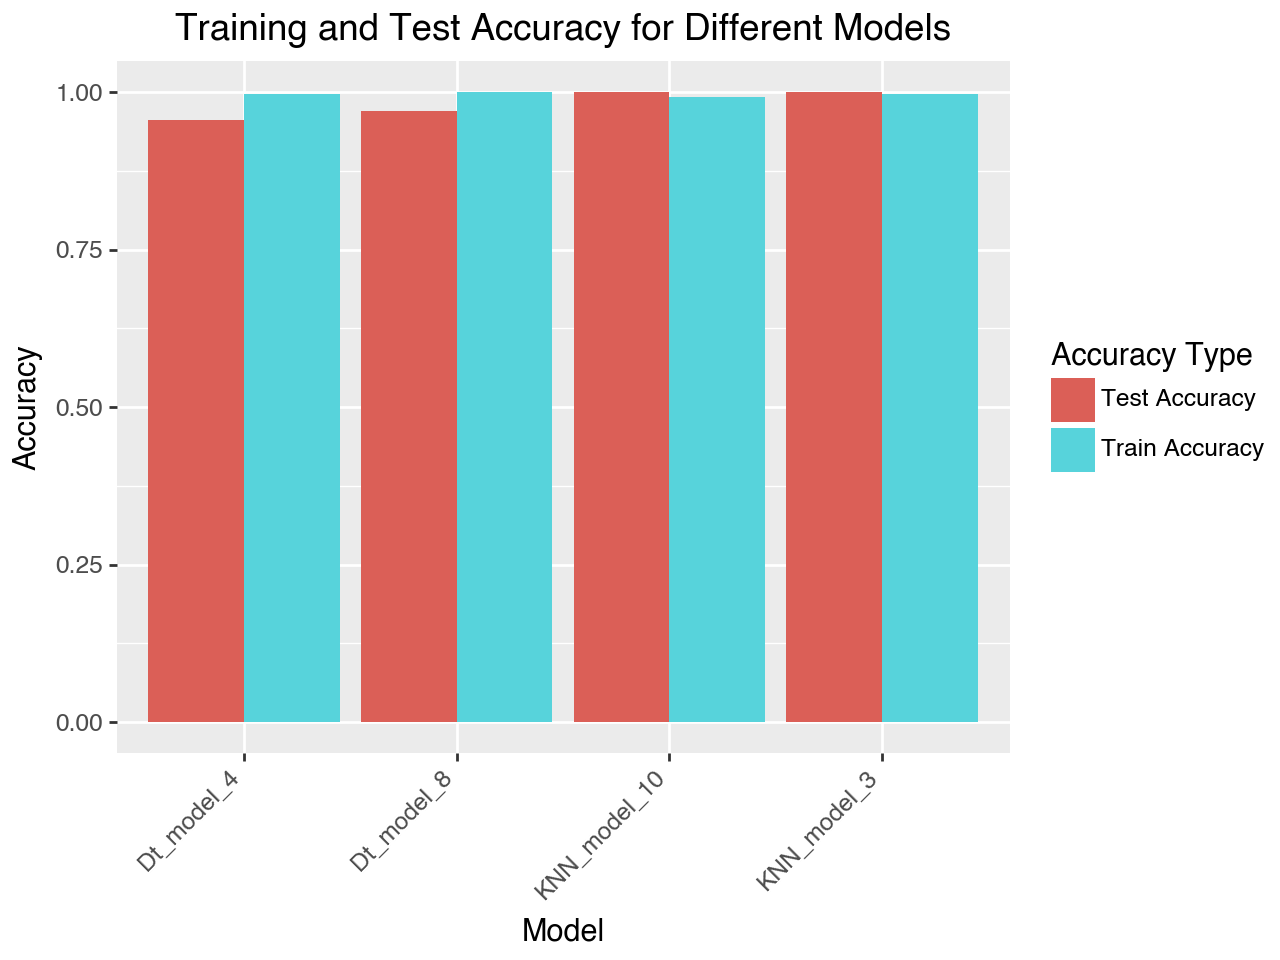

In [37]:
penguins_cleaned = penguins.dropna()
dummy_variables = pd.get_dummies(penguins_cleaned[['island', 'sex']], dtype=int)
penguins_preprocessed = pd.concat([penguins_cleaned.drop(columns=['island', 'sex']), dummy_variables], axis=1)

# Define features (X) and target (y)
X = penguins_preprocessed.drop(columns=['species'])
y = penguins_preprocessed['species']

display(X.head())
display(y.head())

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

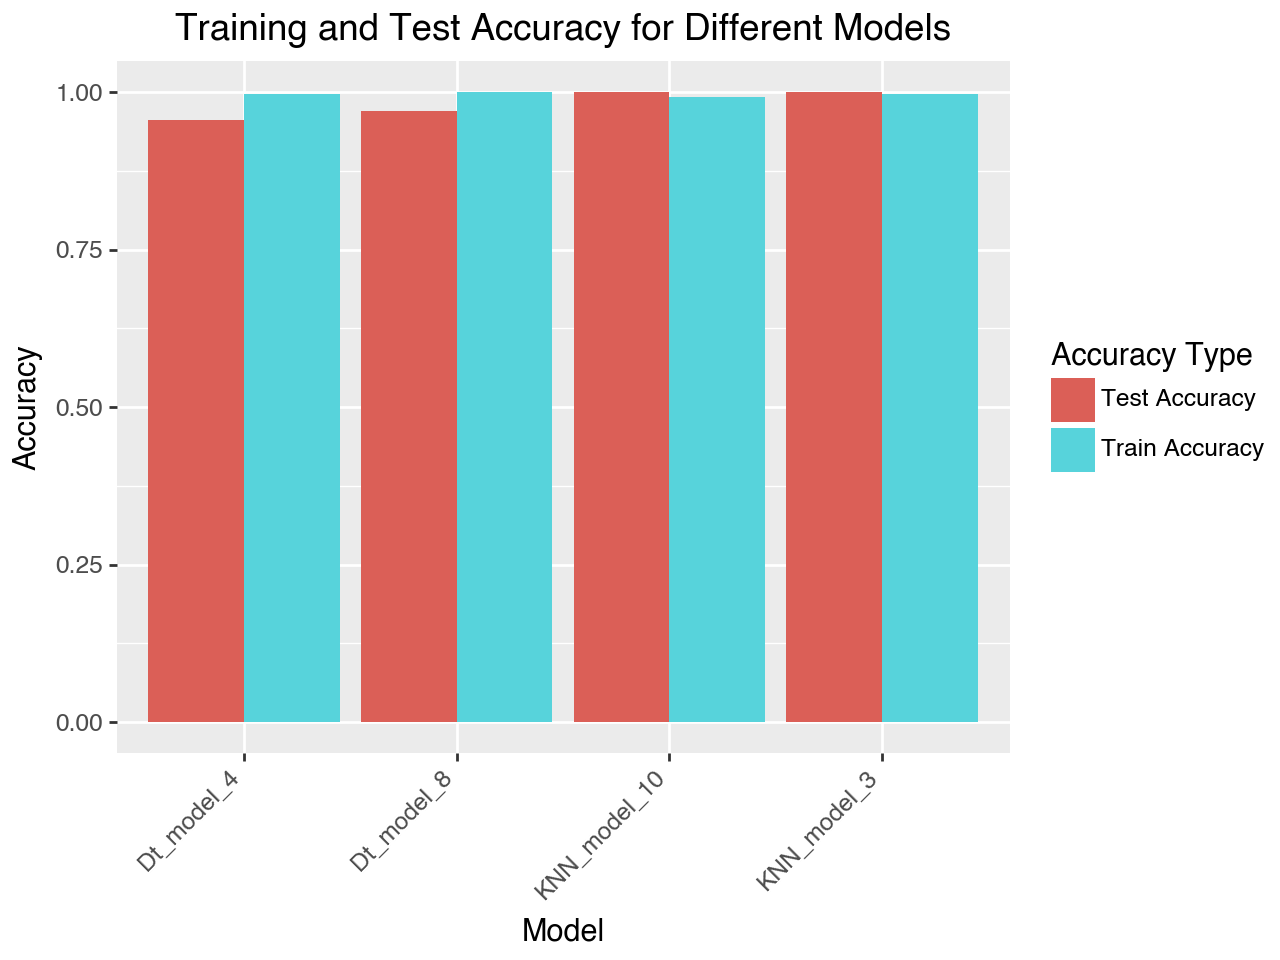

In [38]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the preprocessed X and y data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipelines!

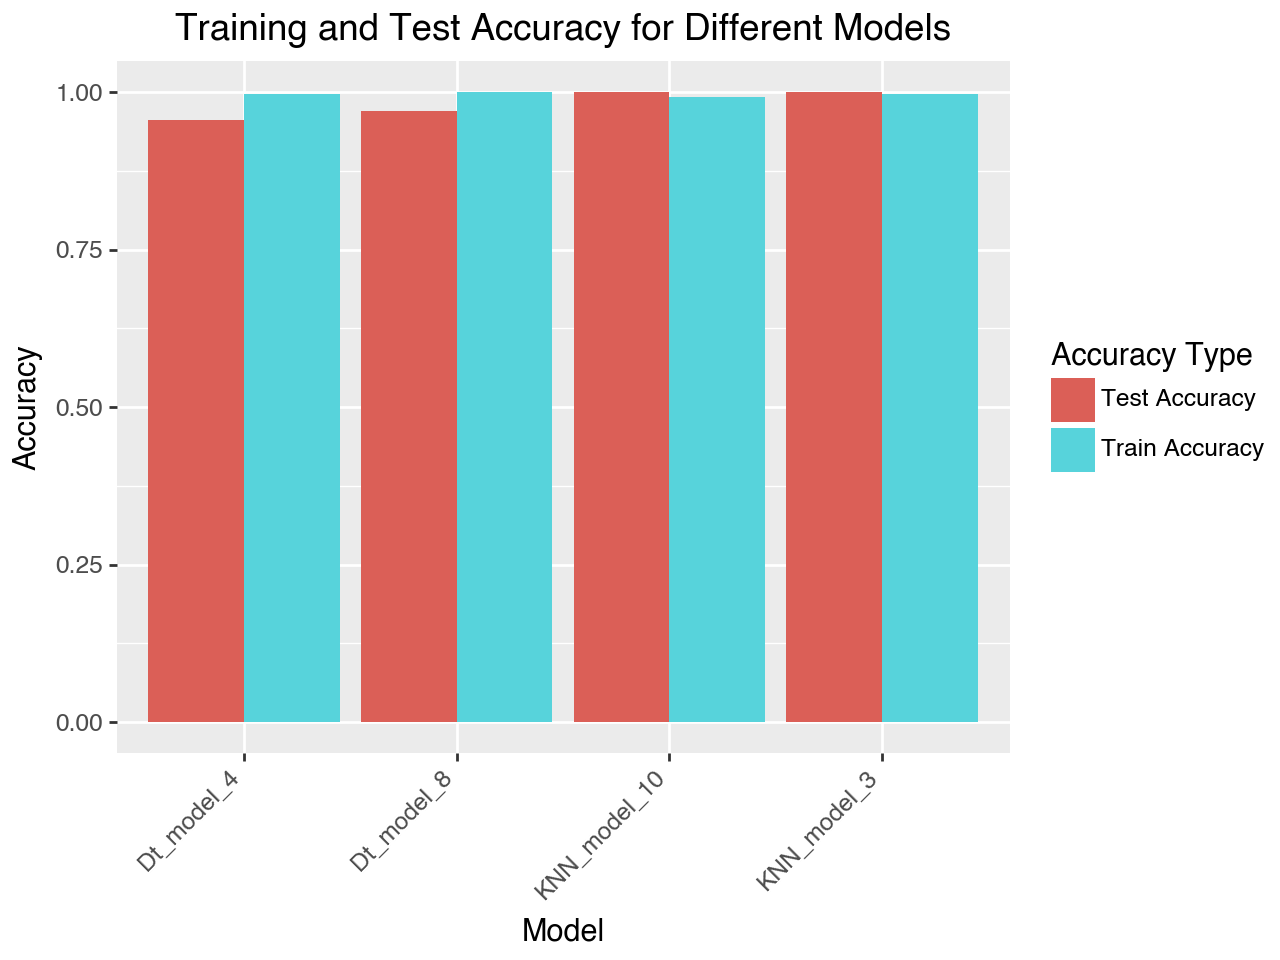

In [39]:
numerical_features = ['bill_length_mm', 'flipper_length_mm', 'body_mass_g']
categorical_features = [col for col in X.columns if col not in numerical_features]

# preprocessors
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# column transformer
ct = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


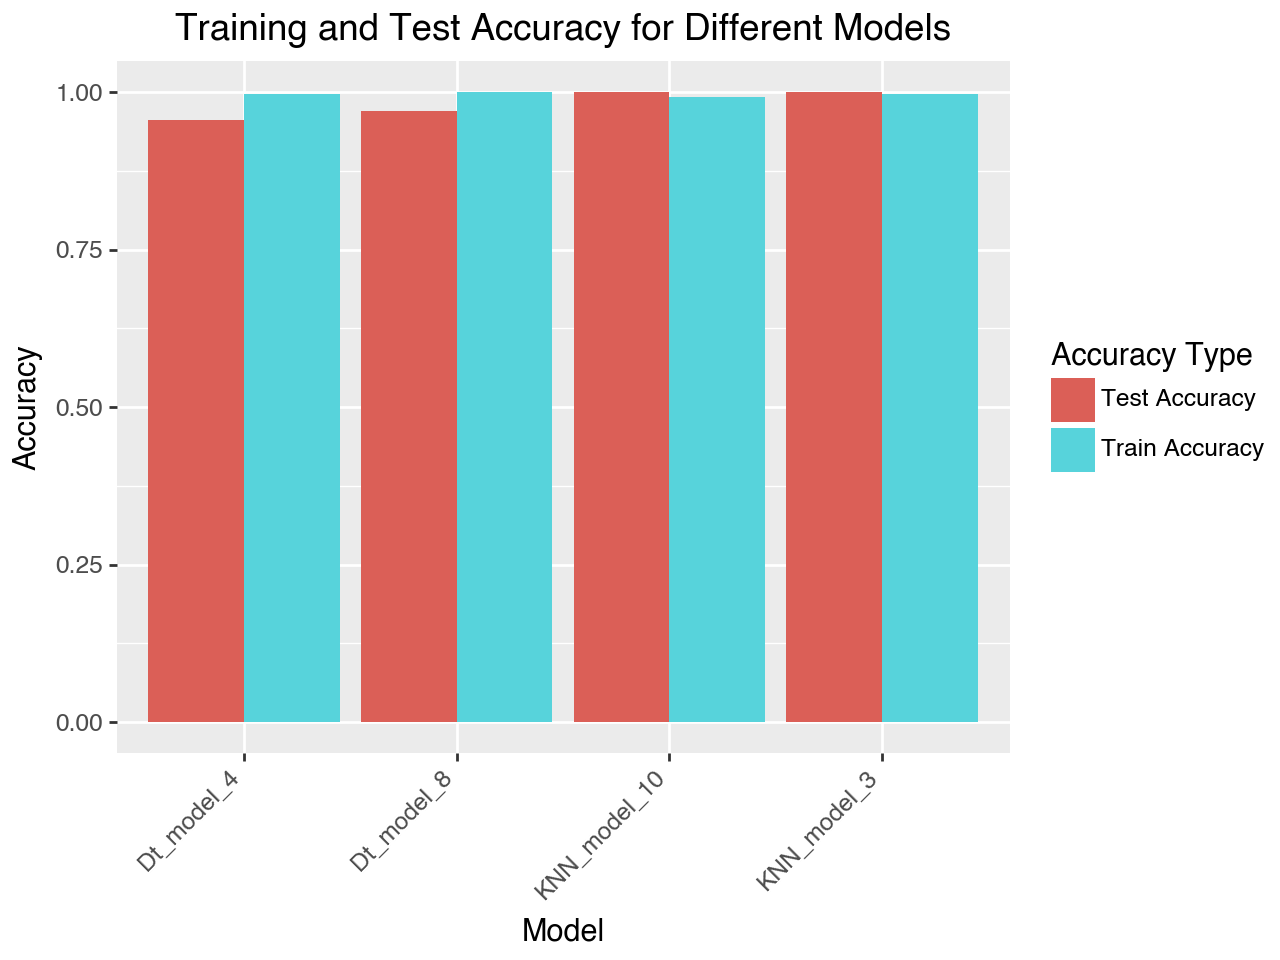

In [40]:
knn_model_3 = KNeighborsClassifier(n_neighbors=3)
knn_model_10 = KNeighborsClassifier(n_neighbors=10)
dt_model_4 = DecisionTreeClassifier(max_depth=4)
dt_model_8 = DecisionTreeClassifier(max_depth=8)

# Create pipelines
pipeline_knn3 = Pipeline(steps=[('preprocessor', ct),
                               ('regressor', knn_model_3)])
pipeline_knn10 = Pipeline(steps=[('preprocessor', ct),
                                ('regressor', knn_model_10)])
pipeline_dt4 = Pipeline(steps=[('preprocessor', ct),
                                ('regressor', dt_model_4)])
pipeline_dt8 = Pipeline(steps=[('preprocessor', ct),
                                ('regressor', dt_model_8)])



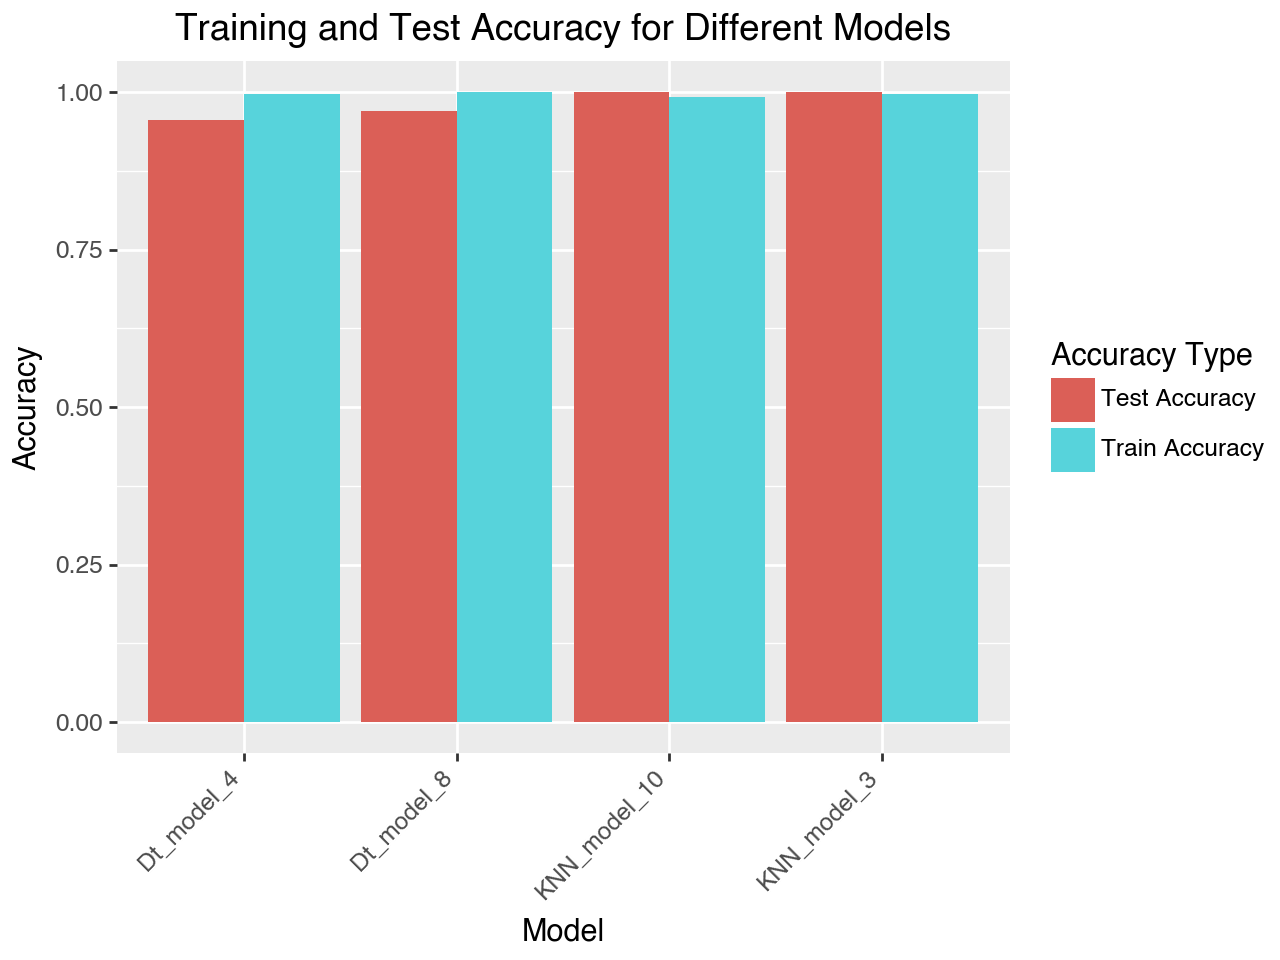

In [41]:
pipeline_knn3.fit(X_train, y_train)
y_train_pred_knn3_pipeline = pipeline_knn3.predict(X_train)
y_test_pred_knn3_pipeline = pipeline_knn3.predict(X_test)

pipeline_knn10.fit(X_train, y_train)
y_train_pred_knn10_pipeline = pipeline_knn10.predict(X_train)
y_test_pred_knn10_pipeline = pipeline_knn10.predict(X_test)

pipeline_dt4.fit(X_train, y_train)
y_train_pred_dt4_pipeline = pipeline_dt4.predict(X_train)
y_test_pred_dt4_pipeline = pipeline_dt4.predict(X_test)

pipeline_dt8.fit(X_train, y_train)
y_train_pred_dt8_pipeline = pipeline_dt8.predict(X_train)
y_test_pred_dt8_pipeline = pipeline_dt8.predict(X_test)

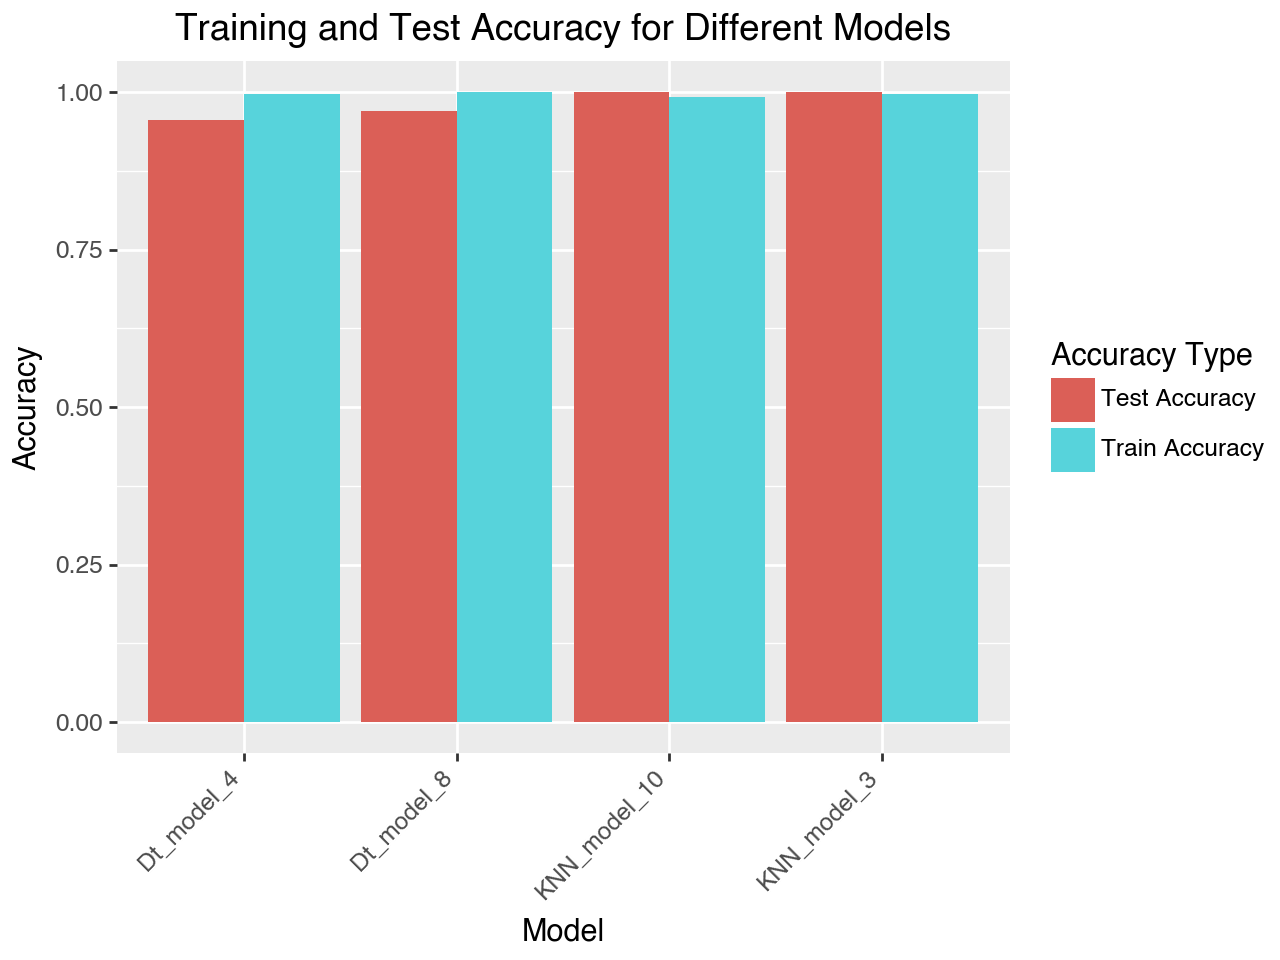

In [42]:
train_accuracy = {
             'KNN_model_3': accuracy_score(y_train, y_train_pred_knn3_pipeline),
             'KNN_model_10': accuracy_score(y_train, y_train_pred_knn10_pipeline),
             'Dt_model_4': accuracy_score(y_train, y_train_pred_dt4_pipeline),
             'Dt_model_8': accuracy_score(y_train, y_train_pred_dt8_pipeline)
}

test_accuracy = {
             'KNN_model_3': accuracy_score(y_test, y_test_pred_knn3_pipeline),
             'KNN_model_10': accuracy_score(y_test, y_test_pred_knn10_pipeline),
             'Dt_model_4': accuracy_score(y_test, y_test_pred_dt4_pipeline),
             'Dt_model_8': accuracy_score(y_test, y_test_pred_dt8_pipeline)
}

Training Accuracies:
KNN_model_3     0.996241
KNN_model_10    0.992481
Dt_model_4      0.996241
Dt_model_8      1.000000
dtype: float64
Test Accuracies:
KNN_model_3     1.000000
KNN_model_10    1.000000
Dt_model_4      0.955224
Dt_model_8      0.970149
dtype: float64


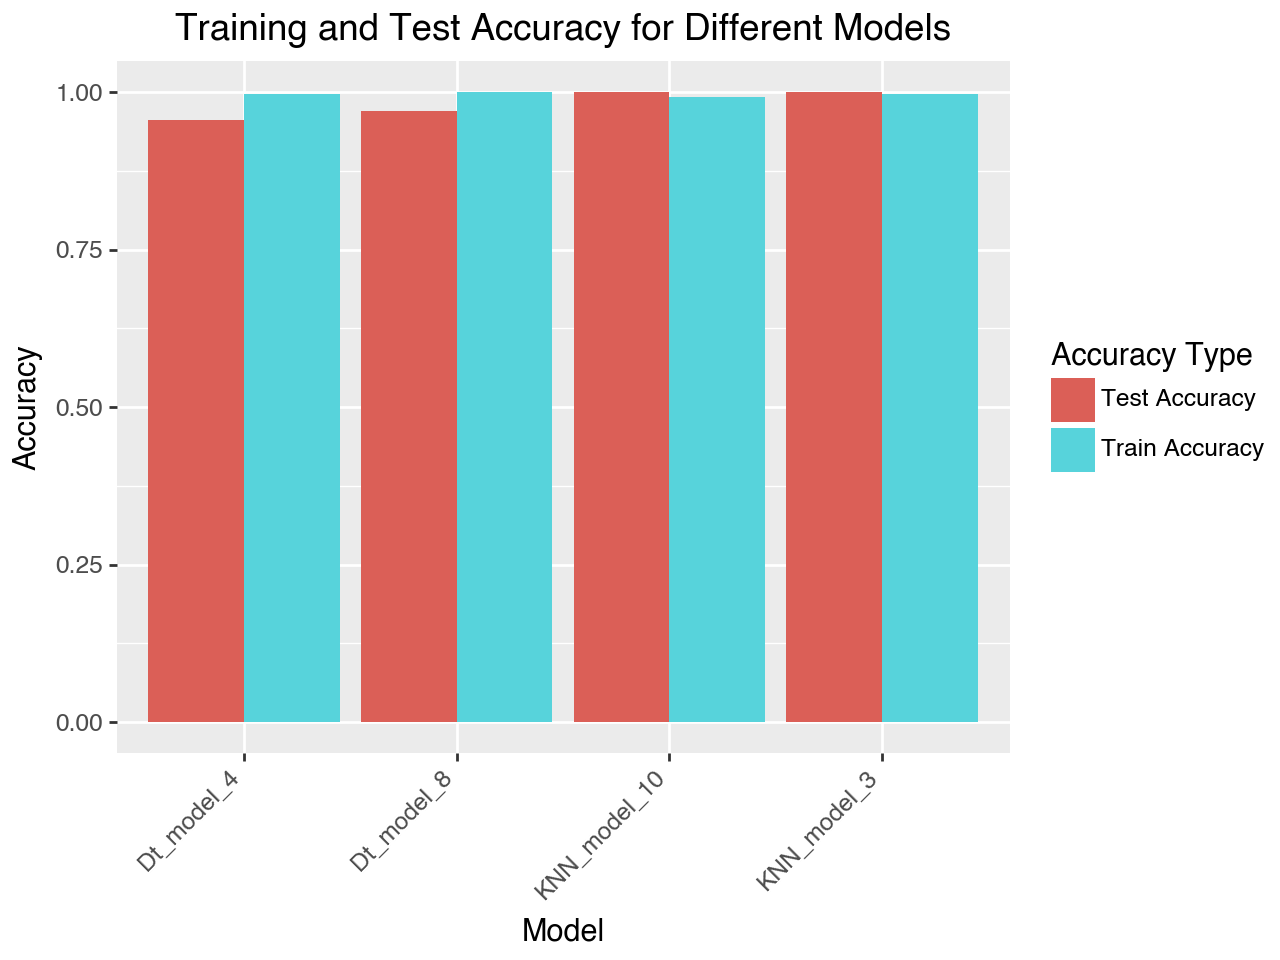

In [43]:
from plotnine import ggplot, aes, geom_bar, labs, theme, element_text
import pandas as pd

errors_df = pd.DataFrame({'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy})

# Convert DataFrame to long format for ggplot
errors_df_long = errors_df.reset_index().melt(id_vars='index', var_name='Accuracy_Type', value_name='Accuracy_Value')
errors_df_long.rename(columns={'index': 'Model'}, inplace=True)

print("Training Accuracies:")
print(pd.Series(train_accuracy))
print("Test Accuracies:")
print(pd.Series(test_accuracy))

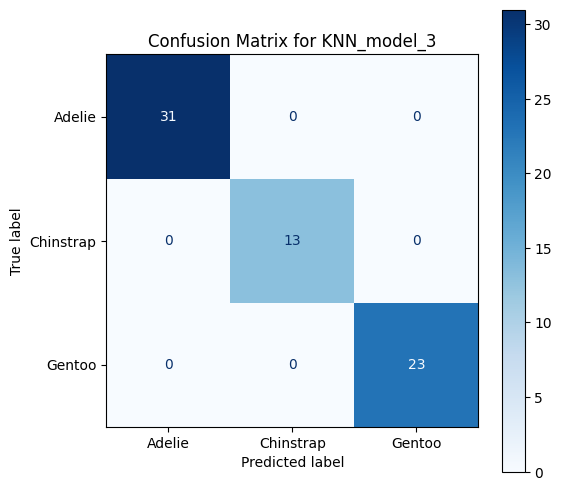

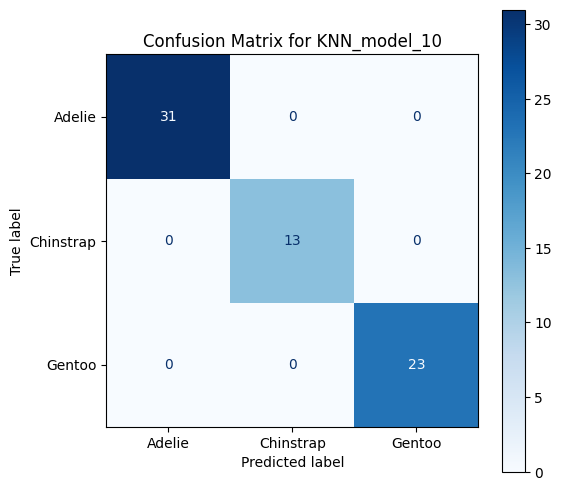

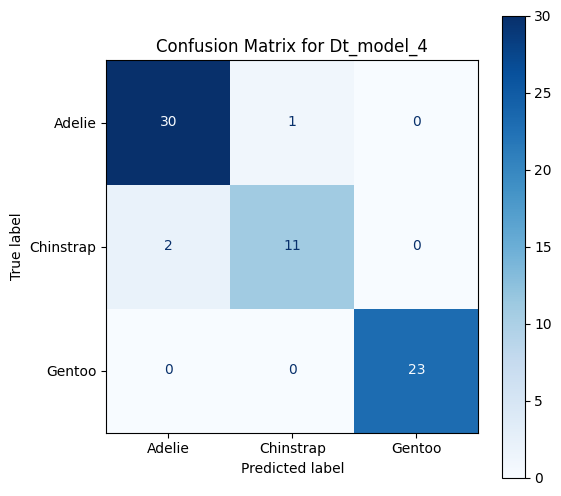

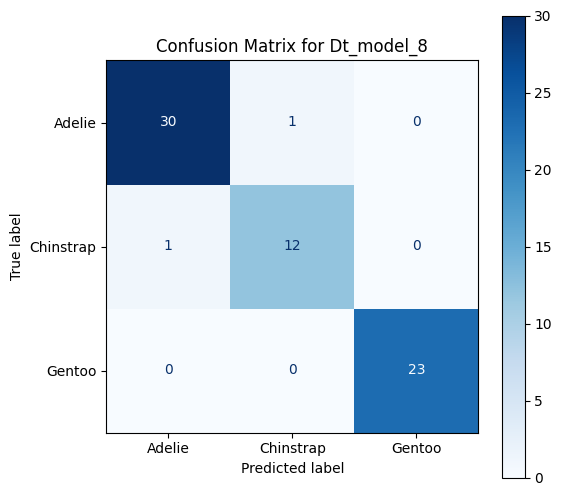

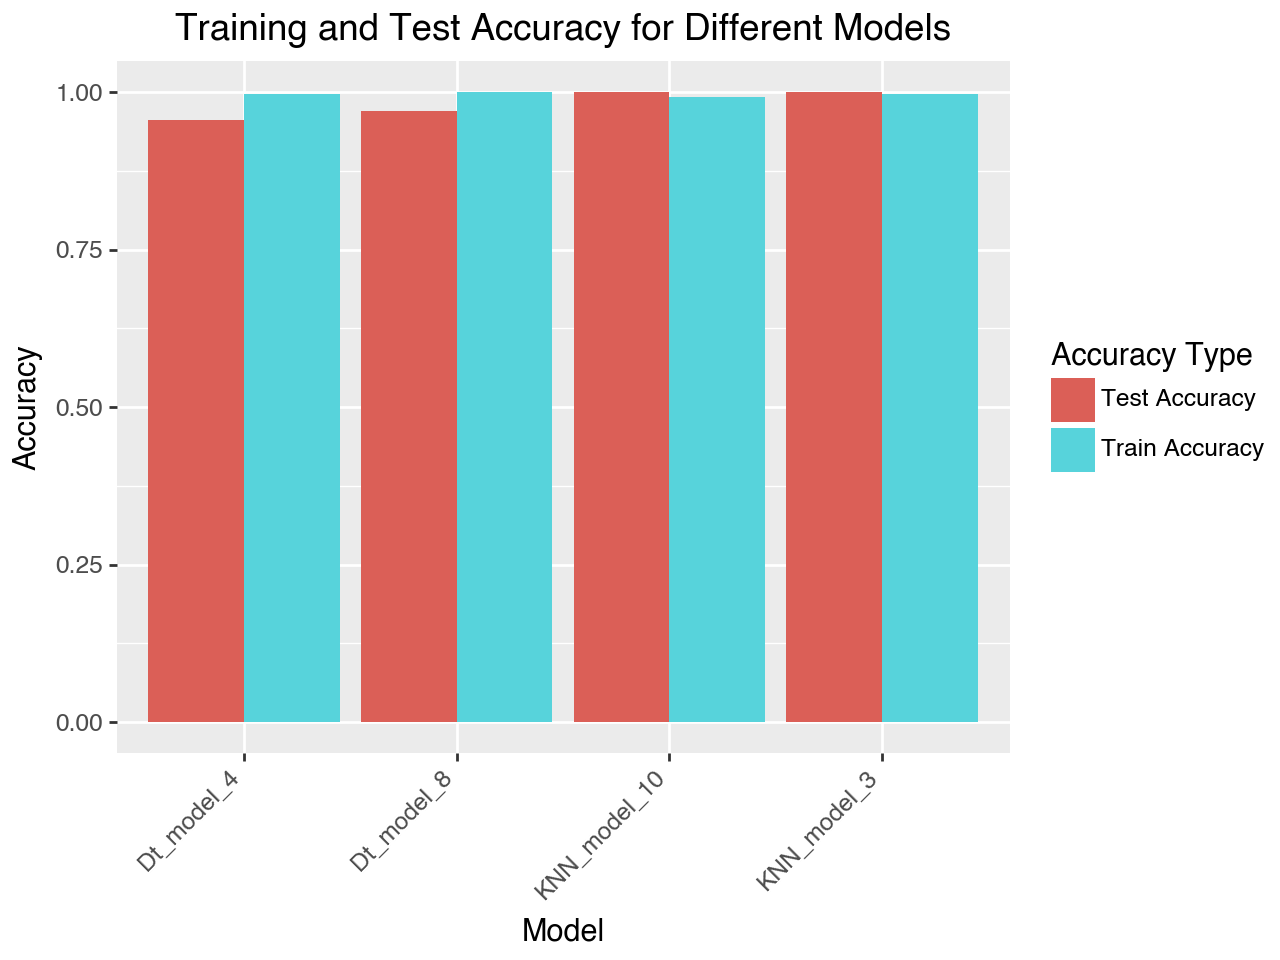

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

species_labels = y.unique()


models = {
    'KNN_model_3': pipeline_knn3,
    'KNN_model_10': pipeline_knn10,
    'Dt_model_4': pipeline_dt4,
    'Dt_model_8': pipeline_dt8
 }


for model_name, model_pipeline in models.items():

    y_pred_model = model_pipeline.predict(X_test)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred_model, labels=species_labels)

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=species_labels)
    fig, ax = plt.subplots(figsize=(6, 6))
    disp.plot(cmap=plt.cm.Blues, ax=ax)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

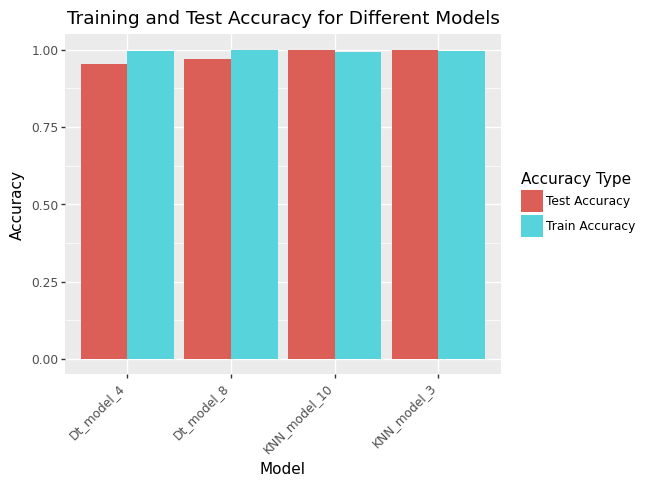

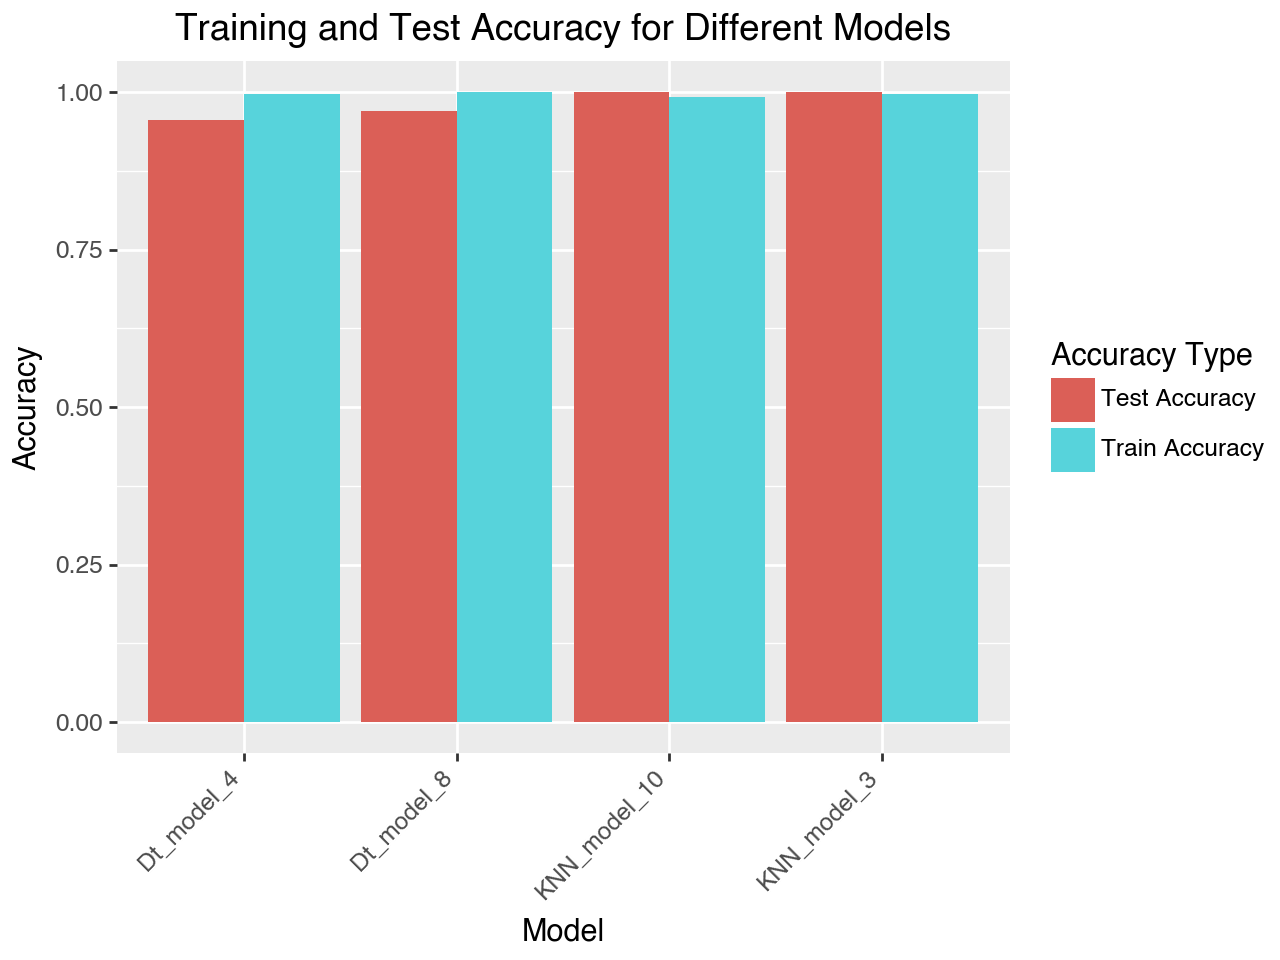

In [45]:
plot = (ggplot(errors_df_long, aes(x='Model', y='Accuracy_Value', fill='Accuracy_Type'))
 + geom_bar(stat='identity', position='dodge')
 + labs(title='Training and Test Accuracy for Different Models',
 x='Model',
 y='Accuracy',
 fill='Accuracy Type')
 + theme(axis_text_x=element_text(rotation=45, hjust=1)))
plot.draw()

Classification Metrics:

--- KNN_model_3 ---
Precision: {'Adelie': 1.0, 'Chinstrap': 1.0, 'Gentoo': 1.0}
Recall: {'Adelie': 1.0, 'Chinstrap': 1.0, 'Gentoo': 1.0}
F1-score: {'Adelie': 1.0, 'Chinstrap': 1.0, 'Gentoo': 1.0}
AUC: {np.str_('Adelie'): np.float64(1.0), np.str_('Chinstrap'): np.float64(1.0), np.str_('Gentoo'): np.float64(1.0)}

--- KNN_model_10 ---
Precision: {'Adelie': 1.0, 'Chinstrap': 1.0, 'Gentoo': 1.0}
Recall: {'Adelie': 1.0, 'Chinstrap': 1.0, 'Gentoo': 1.0}
F1-score: {'Adelie': 1.0, 'Chinstrap': 1.0, 'Gentoo': 1.0}
AUC: {np.str_('Adelie'): np.float64(1.0), np.str_('Chinstrap'): np.float64(1.0), np.str_('Gentoo'): np.float64(1.0)}

--- Dt_model_4 ---
Precision: {'Adelie': 0.9375, 'Chinstrap': 0.9166666666666666, 'Gentoo': 1.0}
Recall: {'Adelie': 0.967741935483871, 'Chinstrap': 0.8461538461538461, 'Gentoo': 1.0}
F1-score: {'Adelie': 0.9523809523809523, 'Chinstrap': 0.88, 'Gentoo': 1.0}
AUC: {np.str_('Adelie'): np.float64(0.942652329749104), np.str_('Chinstrap'): np.float64

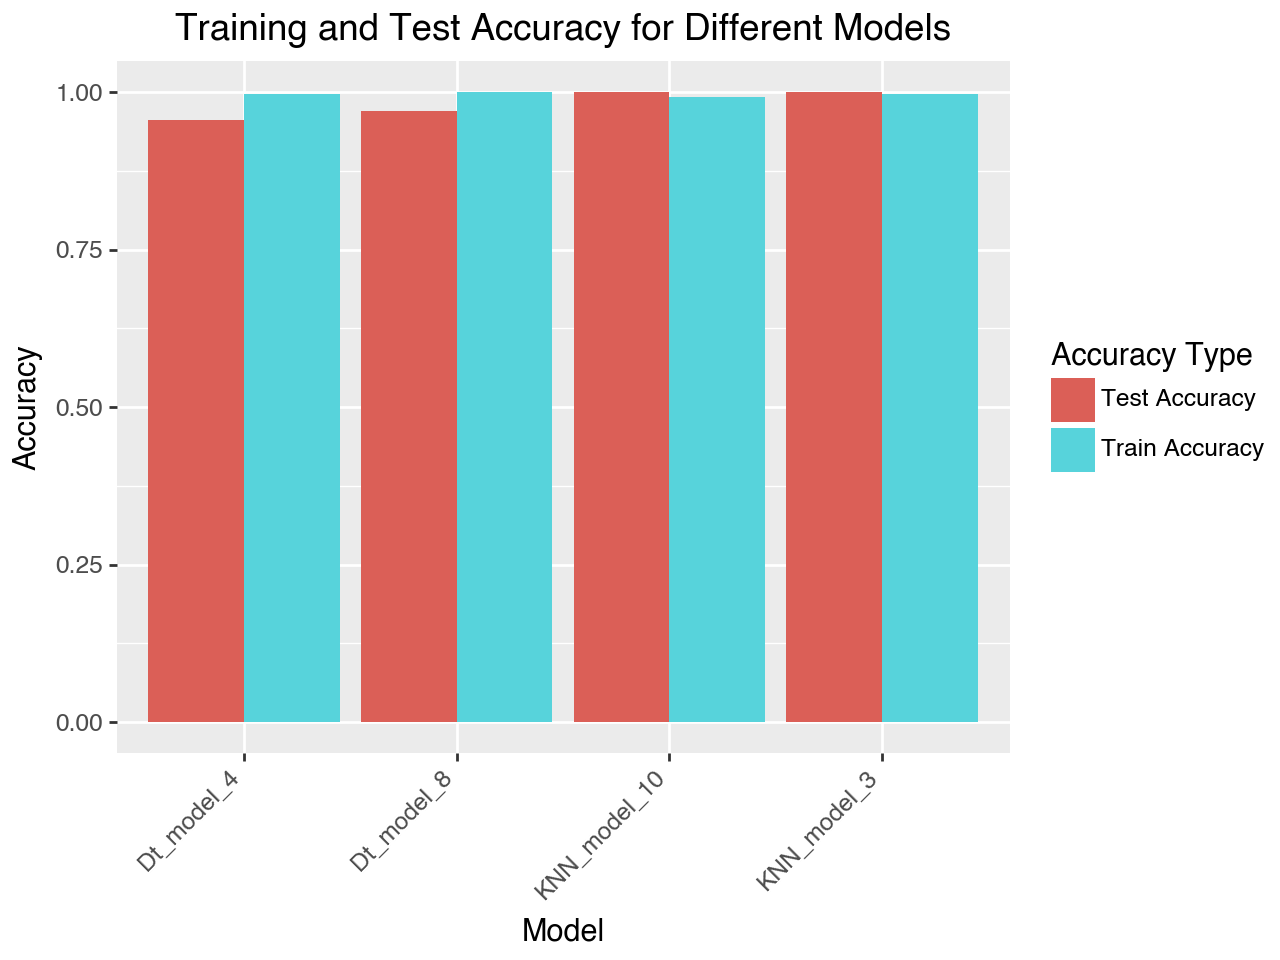

In [46]:
from sklearn.metrics import classification_report, roc_curve, auc
import numpy as np
from sklearn.preprocessing import LabelBinarizer

# Define species_names before its first use
species_names = y.unique()

def get_proba(model, X_test):
    if hasattr(model.named_steps['regressor'], "predict_proba"):
        return model.predict_proba(X_test)
    else:
        return None

metrics = {}

for model_name, model_pipeline in models.items():

    y_pred = model_pipeline.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    metrics[model_name] = {
        'precision': {s: report[s]['precision'] for s in species_names},
        'recall': {s: report[s]['recall'] for s in species_names},
        'f1-score': {s: report[s]['f1-score'] for s in species_names}
    }

    y_proba = get_proba(model_pipeline, X_test)
    if y_proba is not None:
        lb = LabelBinarizer()
        y_test_binarized = lb.fit_transform(y_test)
        if y_test_binarized.ndim == 1:
          y_test_binarized = np.hstack((1 - y_test_binarized.reshape(-1, 1), y_test_binarized.reshape(-1, 1)))
          species_names_sorted = lb.classes_
        else:
          species_names_sorted = lb.classes_

        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i, species in enumerate(species_names_sorted):
            fpr[species], tpr[species], _ = roc_curve(y_test_binarized[:, i], y_proba[:, i])
            roc_auc[species] = auc(fpr[species], tpr[species])
        metrics[model_name]['auc'] = roc_auc

print("Classification Metrics:")
for model_name, model_metrics in metrics.items():
    print(f"\n--- {model_name} ---")
    print("Precision:", model_metrics['precision'])
    print("Recall:", model_metrics['recall'])
    print("F1-score:", model_metrics['f1-score'])
    if 'auc' in model_metrics:
        print("AUC:", model_metrics['auc'])

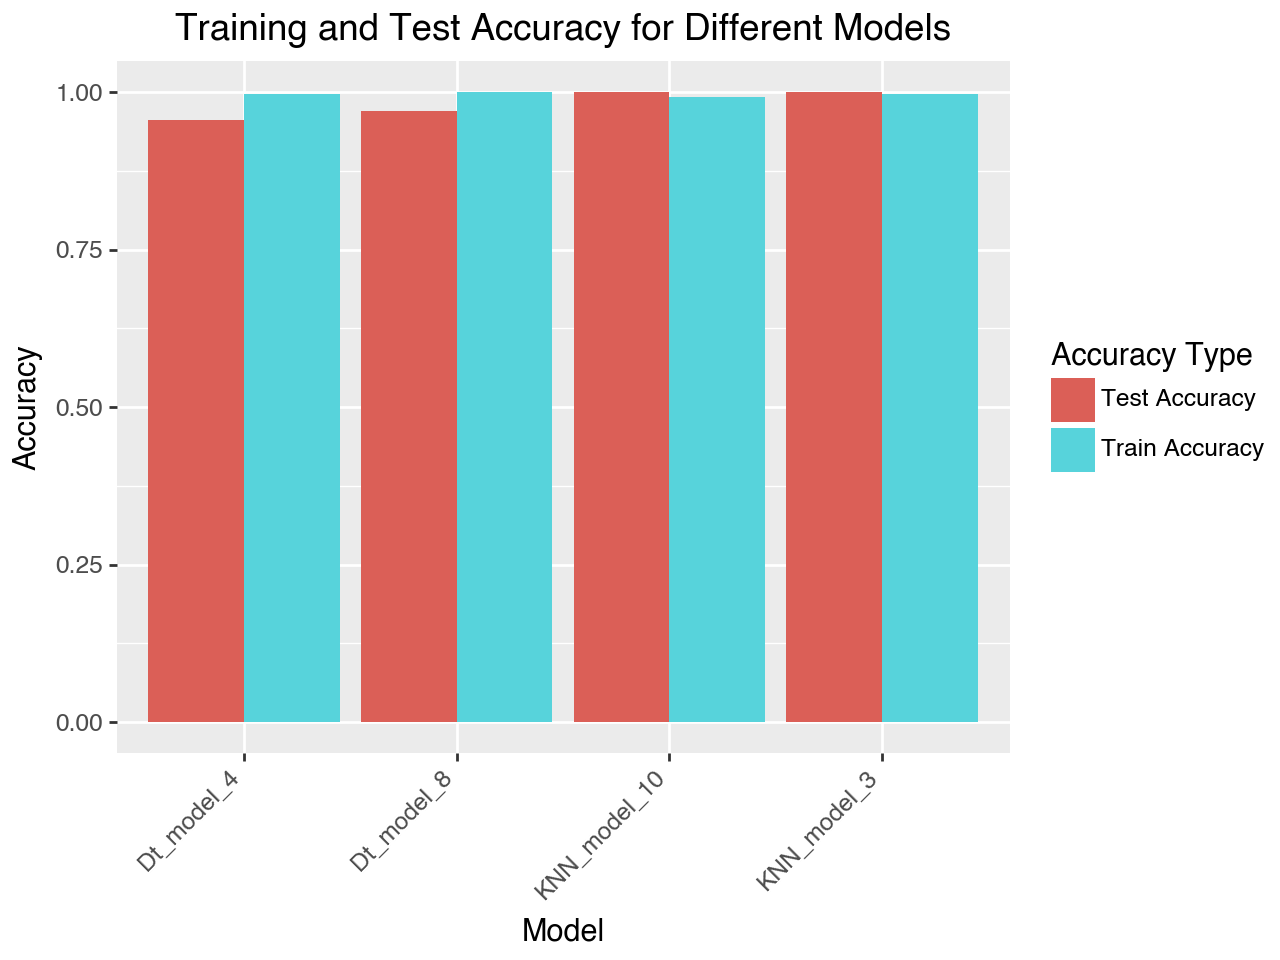

In [48]:
def get_proba(model, X_test):
    if hasattr(model.named_steps['regressor'], "predict_proba"):
        return model.predict_proba(X_test)
    else:
        return None

# Assuming 'models', 'X_test', 'y_test', 'species_names', and 'metrics' are already in the kernel state
# This loop re-calculates and updates the AUC, FPR, and TPR in the existing 'metrics' dictionary
for model_name, model_pipeline in models.items():
    y_proba = get_proba(model_pipeline, X_test)
    if y_proba is not None:
        lb = LabelBinarizer()
        y_test_binarized = lb.fit_transform(y_test)
        if y_test_binarized.ndim == 1:
          y_test_binarized = np.hstack((1 - y_test_binarized.reshape(-1, 1), y_test_binarized.reshape(-1, 1)))
          species_names_sorted = lb.classes_
        else:
          species_names_sorted = lb.classes_

        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i, species in enumerate(species_names_sorted):
            fpr[species], tpr[species], _ = roc_curve(y_test_binarized[:, i], y_proba[:, i])
            roc_auc[species] = auc(fpr[species], tpr[species])
        
        # Update the existing metrics entry for this model
        if model_name not in metrics:
            metrics[model_name] = {}
        metrics[model_name]['auc'] = roc_auc
        metrics[model_name]['fpr'] = fpr
        metrics[model_name]['tpr'] = tpr

In [47]:
from plotnine import ggplot, aes, geom_line, labs, geom_abline, element_text

chosen_species = 'Adelie'

roc_data = []
for model_name, model_metrics in metrics.items():
    if 'auc' in model_metrics and 'fpr' in model_metrics and 'tpr' in model_metrics and chosen_species in model_metrics['auc']:
        df_fpr = pd.DataFrame({'FPR': model_metrics['fpr'][chosen_species]})
        df_tpr = pd.DataFrame({'TPR': model_metrics['tpr'][chosen_species]})
        df_roc = pd.concat([df_fpr, df_tpr], axis=1)
        df_roc['Model'] = f"{model_name} (AUC = {model_metrics['auc'][chosen_species]:.2f})"
        roc_data.append(df_roc)

roc_df = pd.concat(roc_data)

plot = (ggplot(roc_df, aes(x='FPR', y='TPR', color='Model'))
        + geom_line()
        + geom_abline(intercept=0, slope=1, linetype='dashed', color='red')
        + labs(title=f'ROC Curve for {chosen_species} Species (All Models)',
               x='False Positive Rate',
               y='True Positive Rate',
               color='Model')
        + theme(axis_text_x=element_text(rotation=45, hjust=1)))
plot.draw()

ValueError: No objects to concatenate